

# Project: Wine Quality Investigation


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is a wine dataset containing 1599 rows and 12 columns displaying the wine's fixed acidity, residual sugar, citric acid and free sulphur dioxide which would be used to determine the quality of wine.
### Question(s) for Analysis
<li>What chemical attribute are relevant in predicting the quality of wine.</li>
<li>Do wines with higher alcoholic content receive better ratings?.</li>
<li>What amount or level of acidity is associated with the highest quality.</li>
<li>Do sweeter wines receive better ratings</li>
<li>Is a certain type of wine associated with higher quality?</li>

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

In [117]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# load red and white wine datasets
red_df = pd.read_csv('winequality-red.csv', sep = ';') 
white_df =pd.read_csv('winequality-white.csv', sep = ';') 


In [118]:
red_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [119]:
white_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [120]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [121]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [122]:
sum(white_df.duplicated())

937

In [123]:
white_df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

In [124]:
white_df.nunique()

fixed_acidity            68
volatile_acidity        125
citric_acid              87
residual_sugar          310
chlorides               160
free_sulfur_dioxide     132
total_sulfur_dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [125]:
red_df['density'].mean()

0.9967466791744831

In [126]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

In [127]:
red_df['color'] = color_red
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [128]:
white_df['color']= color_white

white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [129]:
# append dataframes
wine_df = red_df.append(white_df, sort = False)

# view dataframe to check for success

wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color,total_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN


In [130]:
wine_df.to_csv('winequality_edited.csv', index=False)

In [131]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  total_sulfur_dioxide  4898 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 761.4+ KB



##### Data Cleaning

In [132]:
red_df.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

In [133]:
df_wine = pd.read_csv('winequality_edited.csv')
df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color,total_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,NaN,0.99114,3.27,0.50,11.2,6,white,92.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,NaN,0.99490,3.15,0.46,9.6,5,white,168.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,NaN,0.99254,2.99,0.46,9.4,6,white,111.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,NaN,0.98869,3.34,0.38,12.8,7,white,110.0


## Scatterplot

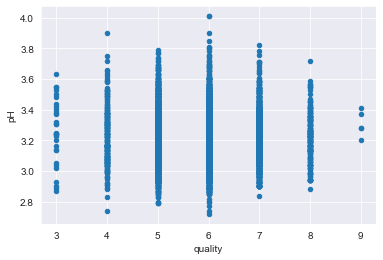

In [134]:
df_wine.plot(x ='quality', y = 'pH', kind = 'scatter' );

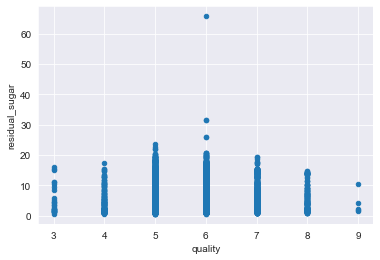

In [135]:
df_wine.plot(x ='quality', y = 'residual_sugar', kind = 'scatter' );

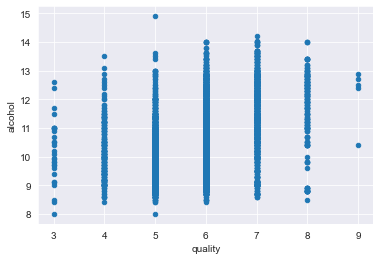

In [136]:
df_wine.plot(x ='quality', y = 'alcohol', kind = 'scatter' );

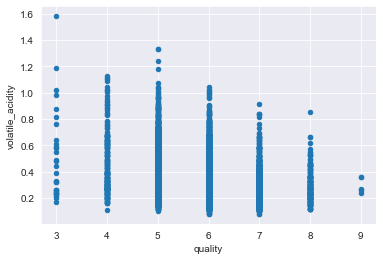

In [137]:
df_wine.plot(x ='quality', y = 'volatile_acidity', kind = 'scatter' );

## Histogram

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>,
        <AxesSubplot:title={'center':'residual_sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'total_sulfur-dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

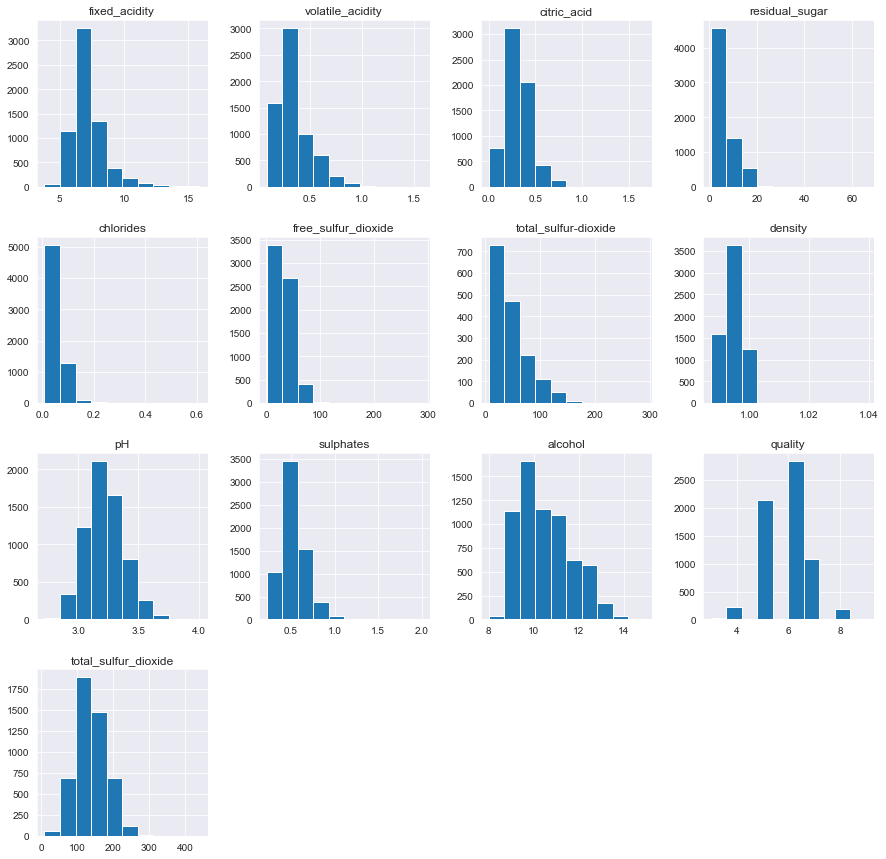

In [138]:
df_wine.hist(figsize = (15, 15))

<AxesSubplot:ylabel='Frequency'>

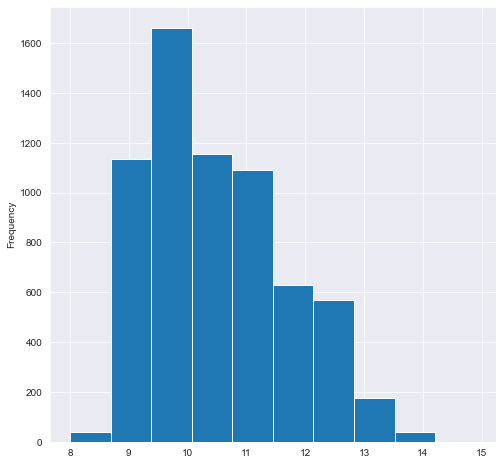

In [139]:
df_wine['alcohol'].plot(kind = 'hist', figsize = (8, 8))

<AxesSubplot:ylabel='Frequency'>

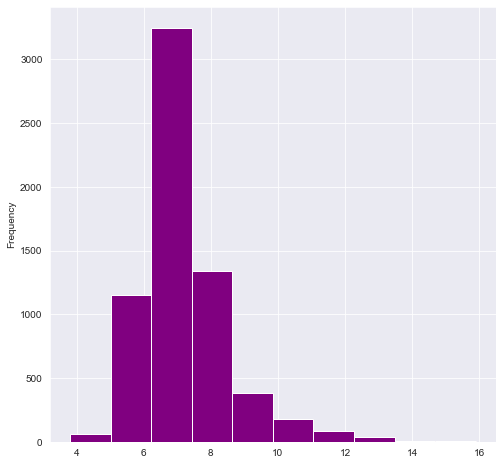

In [140]:
df_wine['fixed_acidity'].plot(kind = 'hist', figsize = (8, 8), color = 'purple')

<AxesSubplot:ylabel='Frequency'>

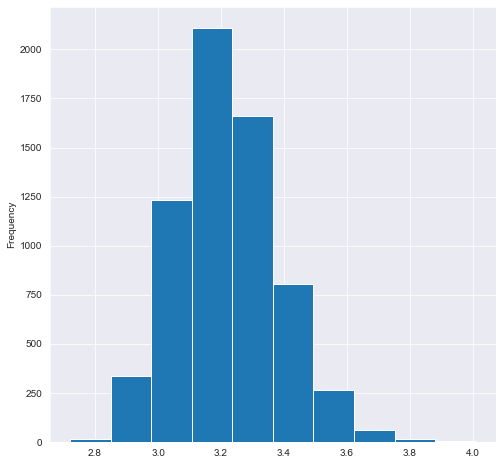

In [141]:
df_wine['pH'].plot(kind = 'hist', figsize = (8, 8))

<AxesSubplot:ylabel='Frequency'>

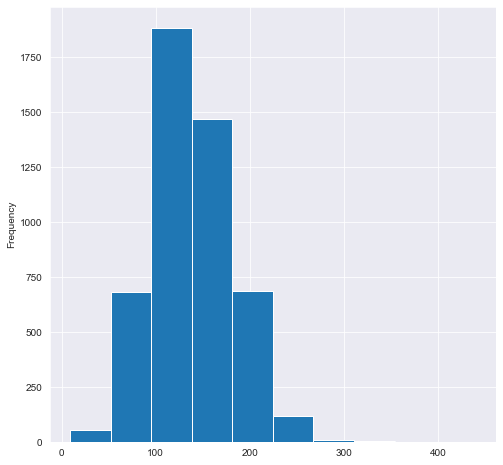

In [142]:
df_wine['total_sulfur_dioxide'].plot(kind = 'hist', figsize = (8, 8))

### Drawing Conclusions Using Groupby

##### Is a certain type of wine associated with higher quality?

In [143]:
# Find the mean quality of each wine type (red and white) with groupby
df_wine.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

##### What amount or level of acidity is associated with the highest quality?

In [144]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df_wine['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [145]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [146]:
# Labels for the four acidity level groups
bin_names = bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [147]:
# Creates acidity_levels column
df_wine['acidity_levels'] = pd.cut(df_wine['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color,total_sulfur_dioxide,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,NaN,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,NaN,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,NaN,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN,low


In [148]:
# Find the mean quality of each acidity level with groupby
acidity_level_quality_means = df_wine.groupby('acidity_levels').mean().quality

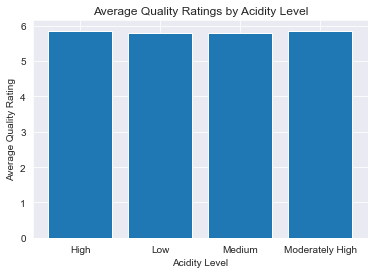

In [149]:
locations = [2, 3, 4, 1]  # reorder values above to go from low to high
heights = acidity_level_quality_means

labels = ['Low', 'Medium', 'Moderately High', 'High']
#labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');


In [150]:
# Save changes for the next section
df_wine.to_csv('winequality_edited.csv', index=False)

### Drawing Conclusions Using Groupby

#### Que 3: Do wines with a higher alcoholic content receive better ratings?

In [151]:
# get the median amount of alcohol content
df_wine['alcohol'].median()

10.3

In [152]:
# select samples with alcohol content less than the median
low_alcohol = df_wine.query('alcohol < 10.300000000000001')

# select samples with alcohol content greater than or equal to the median
high_alcohol = df_wine.query('alcohol >= 10.300000000000001')

# ensure these queries included each sample exactly once
num_samples = df_wine.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [153]:
# get mean quality rating for the low alcohol and high alcohol groups
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_low

5.475920679886686

In [154]:
mean_quality_high = high_alcohol['quality'].mean()
mean_quality_high

6.146084337349397

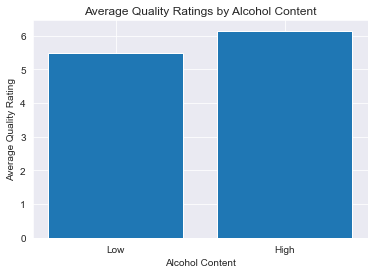

In [155]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

#### Que 4: Do sweeter wines receive better ratings?

In [156]:
# get the median amount of residual sugar
df_wine['residual_sugar'].median()

3.0

In [157]:
# select samples with residual sugar less than the median
low_sugar = df_wine.query('residual_sugar < 3.0')

# select samples with residual sugar greater than or equal to the median
high_sugar =df_wine.query('residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [158]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar['residual_sugar'].mean()

1.8264177254415837

In [159]:
high_sugar['residual_sugar'].mean()

9.012492354740075

In [160]:
mean= df_wine['residual_sugar'].mean()
low_sugar = df_wine.query('residual_sugar < {}'.format(mean))
high_sugar = df_wine.query('residual_sugar > {}'.format(mean))

mean_quality_low = low_sugar['quality'].mean()
mean_quality_low

5.845544554455445

In [161]:
mean_quality_high = high_sugar['quality'].mean()
mean_quality_high

5.773707773707773

Text(0, 0.5, 'Average Quality Rating')

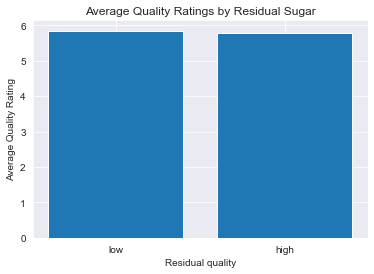

In [162]:
# Create a bar chart 
location = [1, 2]
height = [mean_quality_low, mean_quality_high]
label = ['low', 'high']
plt.bar(location, height, tick_label = label);
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual quality')
plt.ylabel('Average Quality Rating')

### Plotting Wine Type and Quality with Matplotlib

#### Arrays for red bar heights white bar heights
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [163]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [164]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [165]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [166]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [167]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

### Plot proportions on a bar chart
x axis = ratings
y axis = width of each bar

In [168]:
ind = np.arange(len(red_proportions)) #for x
width = 0.35                          #for y

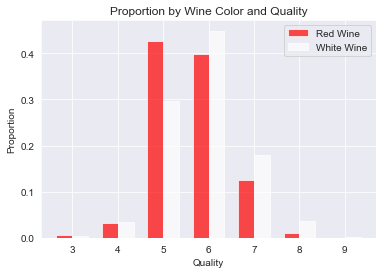

In [169]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

<a id='conclusions'></a>
## Conclusions

In this analysis, i discovered the following:
<li>A low level of acidity receives the highest mean quality rating.</li>
<li>Wines with higher alcohol content receives better ratings</li>
<li>The mean quality of red wine is less than that of white wine.</li>
<li>Sweeter wines receive better ratings.</li>
<li>The chemical attribute relevant in predicting a wines quality are mainly residual sugar, color, alcohol .</li>




In [171]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_Wine_Dataset.ipynb'])

1